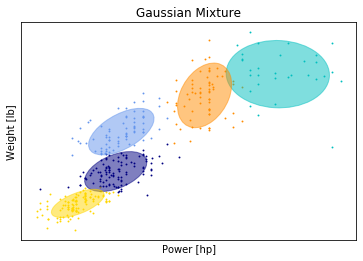

In [1]:

import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline  
########################################################################
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

# load data
cars = pd.read_csv('auto-mpg.data.txt',header=None, sep='\s+')

# extract power and weight as data matrix X
X = cars.iloc[:, [3,4]].values

# extract origin as target value y
y = cars.iloc[:, 7].values

# normalize data
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X) # determine min and max
X_normalized = min_max_scaler.transform(X)

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(1, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.xlabel('Power [hp]')
    plt.ylabel('Weight [lb]')
    plt.title(title)


## Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X_normalized)
plot_results(X_normalized, gmm.predict(X_normalized), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

plt.show()